# Probabilistic Generative Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate synthetic data

We generate mixture-of-Gaussian synthetic data

In [25]:
# Define the number of datapoints per blob
num_blob_1 = 50
num_blob_2 = 50

# Define the mean of the datapoints
muy_1 = [0, 0]
muy_2 = [5, 0]

# Define the covariance matrices
cov = np.array([
    [1, 0],
    [0, 1]
])

# Generate the datapoints
np.random.seed(90)
blob_1 = np.random.multivariate_normal(mean=muy_1, cov=cov, size=num_blob_1)
blob_2 = np.random.multivariate_normal(mean=muy_2, cov=cov, size=num_blob_2)

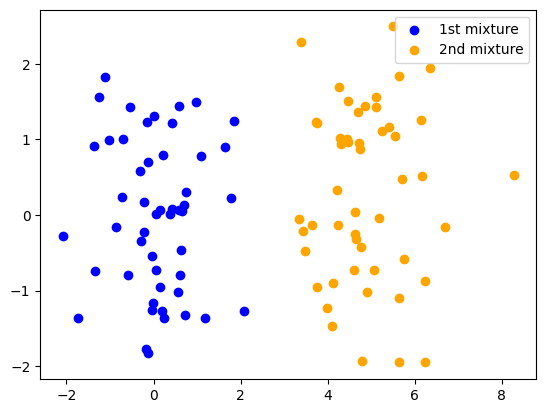

In [26]:
# Display the datapoints
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='1st mixture')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='2nd mixture')
plt.legend()
plt.show()

## Maximum likelihood estimation

We calculate the MLE of the parameters $\mu_1$, $\mu_2$ and $\mathbf{\Sigma}$

In [27]:
# The number of each mixture
N_1 = num_blob_1
N_2 = num_blob_2
N = N_1 + N_2

# The class probability
p_c_1 = N_1 / N
p_c_2 = N_2 / N

# The mean mu_1 and mu_2
mu_1 = np.mean(blob_1, axis=0)
mu_2 = np.mean(blob_2, axis=0)

# Covariance
s_1 = (1 / N_1) * (blob_1 - mu_1.reshape(1, -1)).T @ (blob_1 - mu_1.reshape(1, -1))
s_2 = (1 / N_2) * (blob_2 - mu_2.reshape(1, -1)).T @ (blob_2 - mu_2.reshape(1, -1))
s = (N_1 / N) * s_1 + (N_2 / N) * s_2

# Calculate the parameters
w = np.linalg.solve(s, mu_1 - mu_2)
w_0 = (-1 / 2) * np.dot(mu_1, np.linalg.solve(s, mu_1)) + (1 / 2) * np.dot(mu_2, np.linalg.solve(s, mu_2)) + np.log(p_c_1 / p_c_2)

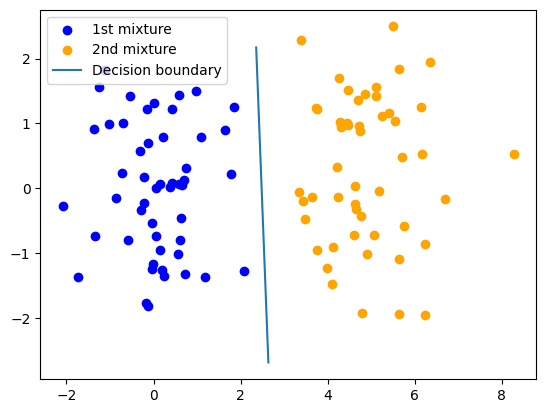

In [35]:
# The w parameters
w_1, w_2 = w[0], w[1]

# Calculate starting and ending points
x_1 = 2.36
y_1 = (-w_0 - w_1 * x_1) / w_2
x_2 = 2.64
y_2 = (-w_0 - w_1 * x_2) / w_2

# Draw the boundary
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='1st mixture')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='2nd mixture')
plt.plot([x_1, x_2], [y_1, y_2], label='Decision boundary')
plt.legend()
plt.show()